# 自由振動のモデル

吉田勝俊（宇都宮大学）

## 参考情報

- [Pythonで運動方程式を解く(odeint) - Qiita](https://qiita.com/binaryneutronstar/items/ad5efa27fd626826846f)
- [[Python] Numpyの参照、抽出、結合 - Qiita](https://qiita.com/supersaiakujin/items/d63c73bb7b5aac43898a)
- [[Python/matplotlib] FuncAnimationを理解して使う - Qiita](https://qiita.com/osanshouo/items/3c66781f41884694838b)

In [26]:
import numpy as np                              #数値計算ライブラリ
from numpy.linalg import norm                   #ベクトルのノルム
from scipy.integrate import odeint              #常微分方程式ライブラリ
import matplotlib.pyplot as plt                 #描画ライブラリ
from matplotlib.animation import FuncAnimation  #アニメーションライブラリ
from matplotlib import rc                       #グラフ調整ライブラリ
#Colab用の設定（グラフィックのインライン表示）
%matplotlib inline
#Colab用の設定（TeX形式の高品位な数式）
rc('text', usetex=True)

## 自由振動系の運動方程式

### パラメータとデフォルト値

In [27]:
m = 1
c = 0.2
k = 1

### 運動方程式（1階化したもの）

In [28]:
def EOM(x, t, m, c, k):
    '''
    自由振動系の運動方程式を表す関数
    '''
    x1, x2 = x
    dxdt = np.array([
        x2,
        (-c*x2 - k*x1)/m,
    ])
    
    return dxdt

## 数値解

In [35]:
def Solve(m, c, k):
    '''
    自由振動系の数値解を求める関数
    '''
    ts = np.linspace(0,20,100) #時間軸を表す数列（0〜20秒を100等分）

    x0 = np.array([
        2,  #初期位置 
        0,   #初速度
    ])

    ###運動方程式を数値的に解く
    Xs = odeint(
        EOM,            #運動方程式を表すユーザ関数
        x0,             #初期値
        ts,             #時間軸を表す数列
        args=(m, c, k)  #運動方程式の係数
    )
  
    x1s = Xs[:,0]   #数値解（変位）
    x2s = Xs[:,1]   #数値解（変位）

    return (ts, x1s, x2s)

### お試し

In [43]:
ts, x1s, x2s = Solve(m=1, c=0.2, k=1)
ts, x1s, x2s

(array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
         1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
         2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
         3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
         4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
         5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
         6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
         7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
         8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
         9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
        10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
        11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
        12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
        13.13131313, 13.33333333, 13.53535354, 13.7

#### 変位の振動波形 $(t,x_1)$

Text(0, 0.5, '$x_1(t)$')

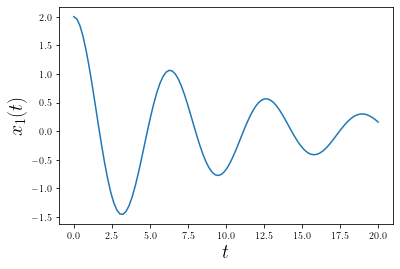

In [44]:
plt.plot(ts, x1s)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$x_1(t)$', fontsize=20)

#### 速度の振動波形 $(t,x_2)$

Text(0, 0.5, '$x_2(t)$')

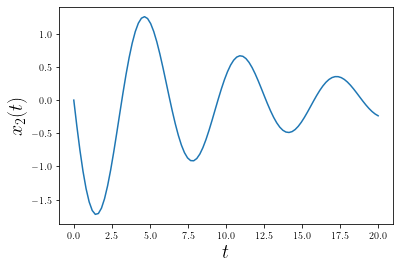

In [45]:
plt.plot(ts, x2s)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$x_2(t)$', fontsize=20)

#### 相軌道 $(x_1,x_2)$

Text(0, 0.5, '$x_2(t)$')

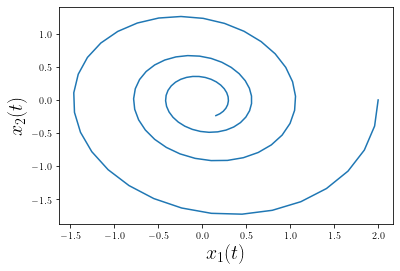

In [46]:
plt.plot(x1s, x2s)
plt.xlabel('$x_1(t)$', fontsize=20)
plt.ylabel('$x_2(t)$', fontsize=20)